# Bioinformatics

## [User]

<span style="color:blue; font-size:20pt">
I want to learn about "3. Bioinformatics Libraries". Can you explain it with example codes?
</span>

## [ChatGPT]

Certainly! Bioinformatics libraries in Python, such as Biopython and scikit-bio, provide tools and functions to handle biological data, including sequence analysis, structure analysis, and more. Here’s a brief introduction to these libraries with example codes.

## Biopython

Biopython is one of the most widely used libraries for bioinformatics in Python. It provides tools for reading and writing different bioinformatics file formats, performing sequence analysis, and interacting with biological databases.



In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('drive/MyDrive/2024-cnu-lecture')

Mounted at /content/drive


### Installation

In [ ]:
!pip install biopython

### Sequence objects

In [ ]:
from Bio.Seq import Seq
my_seq = Seq("AGTACACTGGT")
my_seq

Seq('AGTACACTGGT')

In [ ]:
for index, letter in enumerate(my_seq):
    print("%i %s " % (index, letter))

0 A 
1 G 
2 T 
3 A 
4 C 
5 A 
6 C 
7 T 
8 G 
9 G 
10 T 


In [ ]:
x = [1, 4, 5, 7, 8]
for i in enumerate(x):
    print(i)

for i in x:
    print(i)

(0, 1)
(1, 4)
(2, 5)
(3, 7)
(4, 8)
1
4
5
7
8


In [ ]:
print(my_seq)
print(my_seq[0:3])
print(my_seq[0::2])
print(str(my_seq))
print(my_seq + "ATG")
print(my_seq=="ATG")
print("AGT" in my_seq)

AGTACACTGGT
AGT
ATCCGT
AGTACACTGGT
AGTACACTGGTATG
False
True


In [ ]:
my_seq_low = my_seq.lower()
print(my_seq_low)
print(my_seq_low.upper())
print(my_seq.complement())
print(my_seq.reverse_complement())

agtacactggt
AGTACACTGGT
TCATGTGACCA
ACCAGTGTACT


- Transcription, Translation

In [ ]:
mrna = my_seq.transcribe()
print(mrna)
prot = mrna.translate() ## truncated
print(prot)
print(my_seq.translate())

AGUACACUGGU
STL
STL


/home/haseong/anaconda3/envs/biopy/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [ ]:
from Bio.Data import CodonTable
standard_table = CodonTable.unambiguous_dna_by_id[1]
print(standard_table)
print(standard_table.start_codons)
print(standard_table.stop_codons)
print(type(standard_table))

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

- MutableSeq objects

In [ ]:
from Bio.Seq import Seq
my_seq = Seq("AGTACACTGGT")
my_seq[5] = "G"

In [ ]:
from Bio.Seq import MutableSeq

mutable_seq = MutableSeq(my_seq)
mutable_seq

mutable_seq[5] = "G"
mutable_seq

new_seq = Seq(mutable_seq)
new_seq

Seq('AGTACGCTGGT')

- Finding subsequence

In [ ]:
seq = Seq("GCCATTGTAATGGGCCGCTGAAAGGGTGCCCGA")
print(seq.index("ATG"))
print(seq.find("ATG"))
print(seq.find("AAAAA"))


### SeqRecord

* Sequence annotation objects
* 특정 서열의 identifier나 feature 정보 포함

In [3]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

simple_seq = Seq("GATC")
simple_seq_r = SeqRecord(simple_seq)

In [ ]:
help(SeqRecord)

- class 개념 이해 필요

In [ ]:
simple_seq_r.id = "AC12345"
simple_seq_r.description = "Made up sequence I wish I could write a paper about"
print(simple_seq_r.description)
print(simple_seq_r.seq)

- Read fasta file
- https://www.ncbi.nlm.nih.gov/nuccore/MW015936.1
- Zika virus isolate Zika virus/H.sapiens-tc/THA/2006/CVD_06-020, complete genome

![alt text](images/zika.png)

> 인용구 추가



In [6]:
from Bio import SeqIO
record = SeqIO.read("data/MW015936.gb", "gb")

In [ ]:
print(record)
help(record)

In [ ]:
print(record.id)
print(record.name)
print(record.description)
print(record.seq)
print(record.features)

In [ ]:
print(len(record.seq))
list(record.features)

![alt text](images/zika-features.png)

- Slicing

In [ ]:
print(record.features[0])
print(record.features[1])
print(record.features[2])


- extract sequence

In [ ]:
record.features[2].extract(record.seq)

Seq('ATGAAAAACCCAAAGAAGAAATCCGGAGGATTCCGGATTGTCAATATGCTAAAA...TAA')

* 위치 탐색 in 활용

In [ ]:
for feature in record.features:
    if 4350 in feature:
        print(f"type: {feature.type} start: {feature.location.start} end: {feature.location.end}")

type: source start: 0 end: 10807
type: gene start: 107 end: 10379
type: CDS start: 107 end: 10379
type: mat_peptide start: 4223 end: 4613


* 서열 위치로 직접 슬라이싱

In [ ]:
sub_record = record[3000:5000]
print(sub_record)
print(len(sub_record))
print(len(sub_record.features))
print(sub_record.features[0])
print(sub_record.features[1])

#### Example - find features and plot

[User]

<span style="color:blue; font-size: 20">
I have a genbank file. I want extract all the features of "mat_peptide" type in the file and calculate their length. can you show me a python code?
</span>

[ChatGPT]


Certainly! You can use Biopython to read a GenBank file and extract features of a specific type, such as "mat_peptide". Here's how you can do it:

**Python Script**

Here is the Python script that extracts all "mat_peptide" features from a GenBank file and calculates their lengths:

```python
from Bio import SeqIO

# Function to extract mat_peptide features and calculate their lengths
def extract_mat_peptide_features(file_path):
    record = SeqIO.read(file_path, "genbank")
    mat_peptides = []

    for feature in record.features:
        if feature.type == "mat_peptide":
            start = feature.location.start.position
            end = feature.location.end.position
            length = end - start
            mat_peptides.append({
                "ID": feature.qualifiers.get("product", ["Unknown"])[0],
                "Start": start,
                "End": end,
                "Length": length
            })
    
    return mat_peptides

# Example usage
genbank_file = 'example.gb'  # Replace with your GenBank file path
mat_peptide_features = extract_mat_peptide_features(genbank_file)

# Print the results
for peptide in mat_peptide_features:
    print(f"ID: {peptide['ID']}, Start: {peptide['Start']}, End: {peptide['End']}, Length: {peptide['Length']} bp")
```

**Explanation**

1. **Import Libraries**: Import the necessary modules from Biopython.
2. **extract_mat_peptide_features Function**: This function reads the GenBank file, extracts features of type "mat_peptide", calculates their start and end positions, and determines their lengths.
3. **Example Usage**: Replace `'example.gb'` with the path to your GenBank file. The script will read the file, extract the "mat_peptide" features, and print their IDs, start and end positions, and lengths.

**Running the Script**

1. Save the script to a file, for example, `extract_mat_peptides.py`.
2. Ensure you have the GenBank file (e.g., `example.gb`) in the same directory.
3. Run the script from the command line:
   ```bash
   python extract_mat_peptides.py
   ```

This script will read the GenBank file, extract all "mat_peptide" features, calculate their lengths, and print the details. If you have any specific questions or need further assistance, feel free to ask!

- Find a specific feature

In [ ]:
from Bio import SeqIO

records = SeqIO.parse("data/MW015936.gb", "genbank")
for feature in record.features:
    if feature.type == "mat_peptide":
        print(feature.qualifiers["product"])
        print(feature.location.start, feature.location.end)

- get length and plot

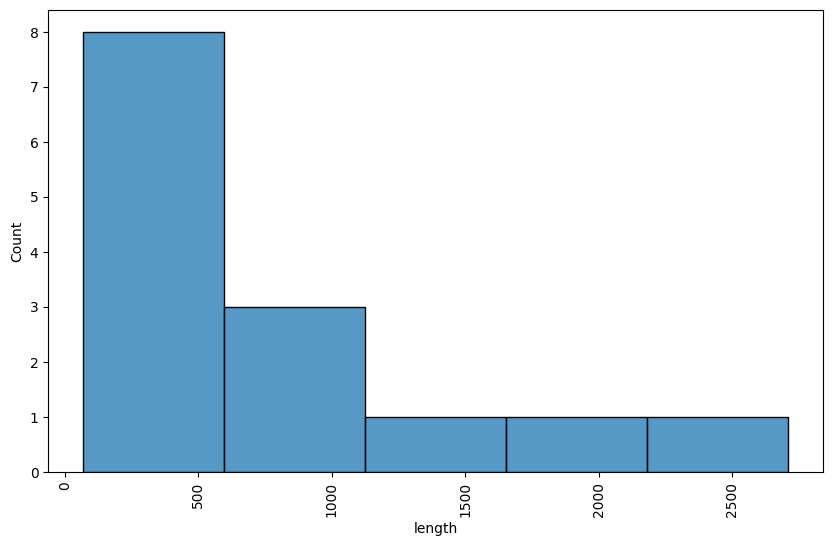

In [ ]:
from Bio import SeqIO
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

mat_peptides = []
records = SeqIO.parse("data/MW015936.gb", "genbank")
for feature in record.features:
    if feature.type == "mat_peptide":
        mat_peptides.append({
            "id": feature.qualifiers["product"],
            "start": feature.location.start,
            "end": feature.location.end,
            "length": feature.location.end - feature.location.start
        })

df = pd.DataFrame(mat_peptides)

plt.figure(figsize = (10, 6))
# df["length"].hist()
sns.histplot(df["length"])
plt.xticks(rotation = 90)
plt.show()


### Entrez

- Provides code to access NCBI over the WWW
- 파일 읽기/쓰기 with 문 사용

In [10]:
from Bio import Entrez
Entrez.email = "kimhaseong@gmail.com"

# Searching NCBI Nucleotide database
handle = Entrez.esearch(db="nucleotide", term="Homo sapiens[Organism] AND BRCA1[Gene]", retmax=5)
record = Entrez.read(handle)
print(record["IdList"])

['262359905', '2703623457', '2703623455', '2703623453', '2703623451']


In [ ]:
from Bio import Entrez
from Bio import SeqIO
entid = record["IdList"][0]

with Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id=entid) as handle:
    seq_record = SeqIO.read(handle, "gb")
print(f"{seq_record.id} with {len(seq_record.features)} features")
print(type(seq_record))
SeqIO.write(seq_record, "/content/drive/My Drive/2024-cnu-lecture/data/"+seq_record.id+".fa", "fasta")
#SeqIO.write(seq_record, seq_record.id+".fa", "fasta")
print(seq_record)

* 여러개 record에 대해서는 parse 함수를 사용

In [ ]:
from Bio import SeqIO

entids = record["IdList"]

with Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id=entids) as handle:
    for seq_record in SeqIO.parse(handle, "gb"):
        print(f"{seq_record.id} {seq_record.description[:50]}")
        print(f"Sequence length {len(seq_record)}, {len(seq_record.features)} \
              features, from {seq_record.annotations['source']}")
        print("\n")
        SeqIO.write(seq_record, "/content/drive/My Drive/2024-cnu-lecture/data/"+seq_record.id+".gb", "gb")

NG_005905.2 Homo sapiens BRCA1 DNA repair associated (BRCA1), 
Sequence length 193689, 130               features, from Homo sapiens (human)


PP465840.1 Homo sapiens isolate TWH-3503-0-1 breast and ovari
Sequence length 5592, 3               features, from Homo sapiens (human)


PP465839.1 Homo sapiens isolate TWH-3747-0-1 truncated breast
Sequence length 891, 3               features, from Homo sapiens (human)


PP465838.1 Homo sapiens isolate TWH-3713-0-1 truncated breast
Sequence length 3462, 3               features, from Homo sapiens (human)


PP465837.1 Homo sapiens isolate OV-0673-0-1 truncated breast 
Sequence length 4167, 3               features, from Homo sapiens (human)




### Pairwise sequence alignment

In [12]:
from Bio import Align

aligner = Align.PairwiseAligner()
aligner.mode = "global"
aligner.mismatch_score = -10
alignments = aligner.align("AAACAAA", "ACGAAAGAAA")
print(aligner)
print(len(alignments))
print(alignments.score)

print(alignments[0])
print(alignments[1])
print(alignments[2])


Pairwise sequence aligner with parameters
  wildcard: None
  match_score: 1.000000
  mismatch_score: -10.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.000000
  query_internal_open_gap_score: 0.000000
  query_internal_extend_gap_score: 0.000000
  query_left_open_gap_score: 0.000000
  query_left_extend_gap_score: 0.000000
  query_right_open_gap_score: 0.000000
  query_right_extend_gap_score: 0.000000
  mode: global

12
6.0
target            0 A--AACA-AA-  7
                  0 |--||-|-||- 11
query             0 ACGAA-AGAAA 10

target            0 A--AACA-A-A  7
                  0 |--||-|-|-| 11
query             0 ACGAA-AGAAA 10

target            0 A--AACA--AA  7
                  0 |--||-|--|| 11
query             0 ACGAA-AGAAA 10



In [13]:
aligner = Align.PairwiseAligner(mismatch_score=-10, mode="local")
alignments = aligner.align("AAACAAA", "ACGAAAGAAA")
print(len(alignments))
print(alignments.score)

print(alignments[0])
print(alignments[1])
print(alignments[2])

12
6.0
target            0 A--AACA-AA  7
                  0 |--||-|-|| 10
query             0 ACGAA-AGAA  9

target            0 A--AACA-A-A  7
                  0 |--||-|-|-| 11
query             0 ACGAA-AGAAA 10

target            0 A--AACA--AA  7
                  0 |--||-|--|| 11
query             0 ACGAA-AGAAA 10



#### Alignment objects

In [15]:

print(alignments[0])
print(type(alignments[0]))
print(alignments[0].shape)
print(alignments[0].indices)

print(alignments[0].counts())
display(alignments[0].frequencies)


target            0 A--AACA-AA  7
                  0 |--||-|-|| 10
query             0 ACGAA-AGAA  9

<class 'Bio.Align.Alignment'>
(2, 10)
[[ 0 -1 -1  1  2  3  4 -1  5  6]
 [ 0  1  2  3  4 -1  5  6  7  8]]
AlignmentCounts(gaps=4, identities=6, mismatches=0)


{'A': array([2., 0., 0., 2., 2., 0., 2., 0., 2., 2.]),
 '-': array([0., 1., 1., 0., 0., 1., 0., 1., 0., 0.]),
 'C': array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0.]),
 'G': array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0.])}

#### [User] biopython을 사용해서 NCBI에서 egfp 와 sfgfp 서열을 다운로드 받고 서열을 비교하는 코드를 알려줘

#### [ChatGPT]

```python
from Bio import Entrez, SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# Always provide your email when using NCBI's Entrez
Entrez.email = "your.email@example.com"  # Replace with your email address

def download_sequence(accession):
    """Download a sequence by its accession number from NCBI."""
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
    seq_record = SeqIO.read(handle, "genbank")
    handle.close()
    return seq_record

def compare_sequences(seq1, seq2):
    """Perform a simple sequence alignment between two sequences."""
    alignments = pairwise2.align.globalxx(seq1.seq, seq2.seq)
    return alignments[0]  # Return the first alignment

# Accession numbers for EGFP and sfGFP from NCBI
egfp_accession = "U55762"  # Example accession, update as necessary
sfgfp_accession = "EU304438"  # Example accession, update as necessary

# Download sequences
egfp_seq = download_sequence(egfp_accession)
sfgfp_seq = download_sequence(sfgfp_accession)

# Compare sequences
alignment = compare_sequences(egfp_seq, sfgfp_seq)

# Print alignment
print(format_alignment(*alignment))

```

#### [User] 출력을 좀 더 보기 좋게 해줘

#### [ChatGTP]

```python
from Bio import Entrez, SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# Always provide your email when using NCBI's Entrez
Entrez.email = "your.email@example.com"  # Replace with your email address

def download_sequence(accession):
    """Download a sequence by its accession number from NCBI."""
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
    seq_record = SeqIO.read(handle, "genbank")
    handle.close()
    return seq_record

def compare_sequences(seq1, seq2):
    """Perform a sequence alignment between two sequences and format the output."""
    # Using a simple scoring: 1 point for match, -1 for mismatch, -2 for opening a gap, -0.5 for extending it
    alignments = pairwise2.align.globalms(seq1.seq, seq2.seq, 2, -1, -2, -0.5, one_alignment_only=True)
    best_alignment = alignments[0]
    return best_alignment

def print_alignment(alignment):
    """Print formatted alignment."""
    aligned_seq1, aligned_seq2, score, start, end = alignment
    match_line = []  # To store the match symbols ('|', ' ', '*')

    for base1, base2 in zip(aligned_seq1, aligned_seq2):
        if base1 == base2:
            match_line.append('|')  # Match
        else:
            match_line.append(' ')  # Mismatch

    # Print the results
    print("Alignment:")
    print("Score:", score)
    print(aligned_seq1[start:end])
    print(''.join(match_line[start:end]))
    print(aligned_seq2[start:end])

# Accession numbers for EGFP and sfGFP
egfp_accession = "U55762"  # Example accession, update as necessary
sfgfp_accession = "EU304438"  # Example accession, update as necessary

# Download sequences
egfp_seq = download_sequence(egfp_accession)
sfgfp_seq = download_sequence(sfgfp_accession)

# Compare sequences
alignment = compare_sequences(egfp_seq, sfgfp_seq)

# Print formatted alignment
print_alignment(alignment)

```


#### [User] 위 코드의 서열 비교 출력을 지정된 base pair 길이만큼 끊어서 보여주는 코드를 만들어줘

#### [ChatGPT]

```python
from Bio import Entrez, SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# Always provide your email when using NCBI's Entrez
Entrez.email = "your.email@example.com"  # Replace with your email address

def download_sequence(accession):
    """Download a sequence by its accession number from NCBI."""
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
    seq_record = SeqIO.read(handle, "genbank")
    handle.close()
    return seq_record

def compare_sequences(seq1, seq2):
    """Perform a sequence alignment between two sequences and format the output."""
    alignments = pairwise2.align.globalms(seq1.seq, seq2.seq, 2, -1, -2, -0.5, one_alignment_only=True)
    return alignments[0]  # Return the first alignment

def print_alignment(alignment, chunk_size=60):
    """Print formatted alignment in chunks."""
    aligned_seq1, aligned_seq2, score, start, end = alignment
    alignment_length = end - start
    print("Alignment Score:", score)
    
    for i in range(0, alignment_length, chunk_size):
        subseq1 = aligned_seq1[start+i:start+i+chunk_size]
        subseq2 = aligned_seq2[start+i:start+i+chunk_size]
        
        # Generate a matching line
        match_line = ''.join('|' if b1 == b2 else ' ' for b1, b2 in zip(subseq1, subseq2))
        
        # Print the alignment in chunks
        print("\nAlignment chunk from position", start+i+1, "to", min(start+i+chunk_size, alignment_length))
        print(subseq1)
        print(match_line)
        print(subseq2)

# Accession numbers for EGFP and sfGFP
egfp_accession = "U55762"  # Example accession, update as necessary
sfgfp_accession = "EU304438"  # Example accession, update as necessary

# Download sequences
egfp_seq = download_sequence(egfp_accession)
sfgfp_seq = download_sequence(sfgfp_accession)

# Compare sequences
alignment = compare_sequences(egfp_seq, sfgfp_seq)

# Print formatted alignment
print_alignment(alignment, chunk_size=60)  # You can adjust the chunk size as needed


```

#### [User] 출력 서열 앞쪽에 각 서열의 accession number를 붙여주고 마지막에는 총 길이와 다른 서열의 개수 등 통계를 출력해줘

#### [ChatGPT]

```python
from Bio import Entrez, SeqIO
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# Always provide your email when using NCBI's Entrez
Entrez.email = "your.email@example.com"  # Replace with your email address

def download_sequence(accession):
    """Download a sequence by its accession number from NCBI."""
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
    seq_record = SeqIO.read(handle, "genbank")
    handle.close()
    return seq_record

def compare_sequences(seq1, seq2):
    """Perform a sequence alignment between two sequences and format the output."""
    alignments = pairwise2.align.globalms(seq1.seq, seq2.seq, 2, -1, -2, -0.5, one_alignment_only=True)
    return alignments[0]  # Return the first alignment

def print_alignment(alignment, seq1_acc, seq2_acc, chunk_size=60):
    """Print formatted alignment in chunks, including accession numbers and statistics."""
    aligned_seq1, aligned_seq2, score, start, end = alignment
    alignment_length = end - start
    total_mismatches = sum(1 for b1, b2 in zip(aligned_seq1, aligned_seq2) if b1 != b2)
    
    print(f"Alignment Score: {score}")
    print(f"Total Length: {alignment_length}")
    print(f"Mismatches: {total_mismatches}")
    
    for i in range(0, alignment_length, chunk_size):
        subseq1 = aligned_seq1[start+i:start+i+chunk_size]
        subseq2 = aligned_seq2[start+i:start+i+chunk_size]
        
        # Generate a matching line
        match_line = ''.join('|' if b1 == b2 else ' ' for b1, b2 in zip(subseq1, subseq2))
        
        # Print the alignment in chunks
        print(f"\n{seq1_acc} (position {start+i+1} to {min(start+i+chunk_size, alignment_length)})")
        print(subseq1)
        print(match_line)
        print(f"{seq2_acc} (position {start+i+1} to {min(start+i+chunk_size, alignment_length)})")
        print(subseq2)

# Accession numbers for EGFP and sfGFP
egfp_accession = "U55762"  # Example accession, update as necessary
sfgfp_accession = "EU304438"  # Example accession, update as necessary

# Download sequences
egfp_seq = download_sequence(egfp_accession)
sfgfp_seq = download_sequence(sfgfp_accession)

# Compare sequences
alignment = compare_sequences(egfp_seq, sfgfp_seq)

# Print formatted alignment
print_alignment(alignment, egfp_accession, sfgfp_accession, chunk_size=60)  # You can adjust the chunk size as needed
```

In [ ]:
!pip install matplotlib

#### [User] 위 비교 결과를 한 줄로 표현되는 그래프로 그려주는 코드를 알려줘

#### [ChatGPT]

```python
from Bio import Entrez, SeqIO
from Bio import pairwise2
import matplotlib.pyplot as plt

# Always provide your email when using NCBI's Entrez
Entrez.email = "your.email@example.com"  # Replace with your email address

def download_sequence(accession):
    """Download a sequence by its accession number from NCBI."""
    handle = Entrez.efetch(db="nucleotide", id=accession, rettype="gb", retmode="text")
    seq_record = SeqIO.read(handle, "genbank")
    handle.close()
    return seq_record

def compare_sequences(seq1, seq2):
    """Perform a sequence alignment between two sequences and format the output."""
    alignments = pairwise2.align.globalms(seq1.seq, seq2.seq, 2, -1, -2, -0.5, one_alignment_only=True)
    return alignments[0]  # Return the first alignment

def plot_alignment(alignment):
    """Plot alignment as a line graph."""
    aligned_seq1, aligned_seq2, score, start, end = alignment
    
    # Create match scores: 1 for match, 0 for mismatch
    match_scores = [1 if b1 == b2 else 0 for b1, b2 in zip(aligned_seq1, aligned_seq2)]
    
    # Plot the results
    plt.figure(figsize=(10, 2))
    plt.plot(match_scores, color='blue', linestyle='-', linewidth=1)
    plt.title("Sequence Alignment")
    plt.xlabel("Position")
    plt.ylabel("Match (1) / Mismatch (0)")
    plt.ylim(-0.1, 1.1)  # Keep the y-axis tight to match/mismatch values
    plt.show()

# Accession numbers for EGFP and sfGFP
egfp_accession = "U55762"
sfgfp_accession = "EU304438"

# Download sequences
egfp_seq = download_sequence(egfp_accession)
sfgfp_seq = download_sequence(sfgfp_accession)

# Compare sequences
alignment = compare_sequences(egfp_seq, sfgfp_seq)

# Plot the alignment graphically
plot_alignment(alignment)
```


### Multiple sequence alignment objects

* http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc70  
* Bio.AlignIO.read() returns a single MultipleSeqAlignment object  
* Bio.AlignIO.parse() returns MultipleSeqAlignment objects  

In [45]:
from Bio import Entrez
Entrez.email = "kimhaseong@gmail.com"

# Searching NCBI Nucleotide database
handle = Entrez.esearch(db="nucleotide", term="esterase[All Fields] AND \"Escherichia coli\"[Primary Organism] AND (\"580\"[SLEN] : \"600\"[SLEN])", idtype="acc")
record = Entrez.read(handle)
print(record["IdList"])

['NZ_CANUGE010000080.1', 'NZ_CANUHA010000080.1', 'NZ_CANUFW010000086.1', 'NZ_JAINSC010000053.1', 'NZ_JAUOTQ010000344.1', 'NZ_RQOE01000407.1', 'RQOE01000407.1', 'QFSK01000273.1', 'PTNY01001592.1', 'NSEG01000063.1', 'KP965724.1', 'AZLZ01000386.1']


In [66]:
from Bio import SeqIO

myidx = [0, 4, 5]
entids = [record["IdList"][x] for x in myidx]
entids

stream = Entrez.efetch(db="nucleotide", rettype="fasta", retmode="text", id=entids)

#write to an output file
with open("data/esterase.fasta", "w") as output:
    output.write(stream.read())

stream.close()

* Alignment tools


* Clustalw를 이용한 서열 정렬 (cactus family Opuntia(선인장))

In [ ]:
!sudo apt-get update
!sudo apt-get install -y clustalw

In [36]:
!clustalw -help




 CLUSTAL 2.1 Multiple Sequence Alignments


                DATA (sequences)

-INFILE=file.ext                             :input sequences.
-PROFILE1=file.ext  and  -PROFILE2=file.ext  :profiles (old alignment).


                VERBS (do things)

-OPTIONS            :list the command line parameters
-HELP  or -CHECK    :outline the command line params.
-FULLHELP           :output full help content.
-ALIGN              :do full multiple alignment.
-TREE               :calculate NJ tree.
-PIM                :output percent identity matrix (while calculating the tree)
-BOOTSTRAP(=n)      :bootstrap a NJ tree (n= number of bootstraps; def. = 1000).
-CONVERT            :output the input sequences in a different file format.


                PARAMETERS (set things)

***General settings:****
-INTERACTIVE :read command line, then enter normal interactive menus
-QUICKTREE   :use FAST algorithm for the alignment guide tree
-TYPE=       :PROTEIN or DNA sequences
-NEGATIVE    :protein align

In [67]:
!cat data/esterase.fasta

>NZ_CANUGE010000080.1 Escherichia coli strain ROAR-416 / O18:H7 / fimH15 / 95 (ST Warwick) isolate Faeces NODE_80_length_585_cov_58.954717, whole genome shotgun sequence
GGCGGCCTCTATACCCGCTTATGGCATGACAGCGTCAGCAGTACTGCGCTCCATCGCCAGCACAACATGA
AGGAGGAAACCCCGGGATAGTTACTGGACACGTAATGTATTAAAAACACAGTCAGAAGCGGCGGTACCGT
GAATAGCCGCTTTAATTATTTATACTGACATCCTTAATTTTTAAAGAGTATGAATGCTGAACATGCAACA
ACATCCCTCTGCTATCGCCAGCCTGCGCAACCAACTGGCAGCGGGCCACATTGCTAACCTTACTGACTTC
TGGCGCGAAGCTGAGTCGCTGAATGTTCCTCTTGTGACGCCAGTCGAAGGAGCGGAAGATGAGCGAGAAG
TGACCTTTCTGTGGCGCGCCCGACATCCTCTGCAGGGCGTTTATCTGCGTCTGAACCGGGTGACGGATAA
AGAGCACGTAGAAAAAGGAATGATGAGCGCCCTTCCCGAAACGGATATCTGGACACTGACACTGCGTTTA
CCCGCAAGTTACTGCGGCTCCTATTCGCTGCTGGAAATCCCCCCCGGCACTACGGCTGAGACGATTGCAC
TGTCCGGAGGCCGTTTTGCCACCCT

>NZ_JAUOTQ010000344.1 Escherichia coli strain SCL2922 NODE_344_length_581_cov_2.811508, whole genome shotgun sequence
GAATGGAACGGCGGCTTCCACACCGGACAACTGCTTACCTCCATGCGCATTATCGCCGGGAAATCTCGCC
AGGTTCGGCTCTATATTCCGGACGTTGATATTTCTCAGCCCCTCGG

In [68]:
!clustalw -infile=data/esterase.fasta -outfile=data/esterase.aln




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: NZ_CANUGE010000080.1   585 bp
Sequence 2: NZ_JAUOTQ010000344.1   581 bp
Sequence 3: NZ_RQOE01000407.1      581 bp
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  4
Sequences (1:3) Aligned. Score:  4
Sequences (2:3) Aligned. Score:  3
Guide tree file created:   [data/esterase.dnd]

There are 2 groups
Start of Multiple Alignment

Aligning...
Group 1:                     Delayed
Group 2:                     Delayed
Alignment Score 3099

CLUSTAL-Alignment file created  [data/esterase.aln]



In [69]:
from Bio import AlignIO
align = AlignIO.read("data/esterase.aln", "clustal")
print(align)

Alignment with 3 rows and 641 columns
--------------GGCGGCCTCTATACCCGCTTATGGCATGAC...CCT NZ_CANUGE010000080.1
-----GAATGGAACGGCGGCTTCCACACCGGACAACTGCTTACC...--- NZ_JAUOTQ010000344.1
ACTGAATATCGCTCGGCAACG-CCGCGGCTTATGGGGGCACTCC...--- NZ_RQOE01000407.1


In [ ]:
align.substitutions

In [70]:
from Bio import Phylo
tree = Phylo.read("data/esterase.dnd", "newick")
Phylo.draw_ascii(tree)

  ______________________________________________________ NZ_CANUGE010000080.1
 |
_|_______________________________________________________ NZ_JAUOTQ010000344.1
 |
 |________________________________________________________ NZ_RQOE01000407.1



#### Position specific scoring matrix (PSSM) matrix

In [77]:
from Bio import AlignIO
from Bio.Align import AlignInfo

* Pfam은 단백질 페밀리 database, 각 서열 그룹을 align 한 파일이 제공됨
* Family: Sigma54_activ_2 (PF14532) https://www.ebi.ac.uk/interpro/entry/pfam/PF14532/

In [79]:
align = AlignIO.read("/content/drive/MyDrive/2024-cnu-lecture/data/PF14532_full.txt", "stockholm")
print(align)
print(len(align))


Alignment with 1240 rows and 765 columns
--------------------------------------------...--- A0A1F7TK17_9BACT/134-279
--------------------------------------------...--- A0A1H8MG25_9RHOB/297-456
--------------------------------------------...--- A0A0P1IVG1_9RHOB/141-283
--------------------------------------------...--- V7EPJ0_9RHOB/141-283
--------------------------------------------...--- B1ZTM1_OPITP/145-296
--------------------------------------------...--- W3ANH6_9FIRM/219-355
--------------------------------------------...--- Q6LNI3_PHOPR/144-289
--------------------------------------------...--- A0A1G8U4Y5_9RHOB/145-284
--------------------------------------------...--- W1HPT9_KLEPN/143-283
--------------------------------------------...--- A0A0D6TAT1_9RHOB/146-292
--------------------------------------------...--- A0A1M4UVA9_9CLOT/309-454
--------------------------------------------...--- A0A252BQ85_9PROT/8-137
--------------------------------------------...--- A0A0P1G5P1_9RHOB/1

* slicing alignment

In [83]:
print(align[3:8,100:200])


Alignment with 5 rows and 100 columns
--V---A---R---V---M--------N---T----D-------...K-- V7EPJ0_9RHOB/141-283
--V---K---K---L---A--------A---V----R-------...E-- B1ZTM1_OPITP/145-296
--A---E---K---L---S--------R---T----D-------...N-- W3ANH6_9FIRM/219-355
--I---A---N---I---A--------L---T----N-------...K-- Q6LNI3_PHOPR/144-289
--V---R---L---V---A--------R---A----G-------...E-- A0A1G8U4Y5_9RHOB/145-284


* Turn the alignment object into an array of letters

In [88]:
import numpy as np
from Bio import AlignIO
align = AlignIO.read("/content/drive/MyDrive/2024-cnu-lecture/data/esterase.aln", "clustal")

# convert to character array
align_array = np.array([list(rec) for rec in align], 'U')
print(align_array)


[['-' '-' '-' ... 'C' 'C' 'T']
 ['-' '-' '-' ... '-' '-' '-']
 ['A' 'C' 'T' ... '-' '-' '-']]
(3, 641)


Note that this leaves the original Biopython alignment object and the NumPy array in memory as separate objects - editing one will not update the other!

In [89]:
align_array.shape

(3, 641)

* SummaryInfo 클래스
 * consensus sequence, position specific score matrix 계산
 * information content와 substitution 정보 계산 가능

In [97]:
summary_align = AlignInfo.SummaryInfo(align)
consensus = summary_align.dumb_consensus()
print(consensus)
my_pssm = summary_align.pos_specific_score_matrix(consensus, chars_to_ignore = ['N', '-'])
#print(my_pssm)
# your_pssm[sequence_number][residue_count_name]
[s for s in my_pssm][:20]

ACTGAXXATXGXXCGGCXXCXTCXXXXXCXXXXXXXXGCXXXXCXXCXXXXGCXXXXXXGXXXXGXXXXXXXGXCXGXXXXXXXXXXAXXXXXXGXXXXXXXAXAXXXCXXXXXXXXXCGGXXTGGXCXXXXXXXXXXXTXXTGXXXCXXXGXXXXXXXACXXXGGXXXXXXCXXXGCAATXGXXGCXXXXAXXAXXXXXXXXXXXATXGXXXXXXXXXXXXXAXXGXGXXXXXAXCGGXXXXXXXATGCXXXXXXXXXXCXXTCGXXXATXXXXXXCXXXCXCAXXXXXCTGXXAXXXXXXXXCXXXXXXXXXXTXXTXXXGGAXXXXXXXXXCXXAXXAXXCGXXXXGXXXXTXXXXXXCXCCXXTXGXXXXXXXXXXXXXXXXXXCXGXXXXXXXXXXXXAAXTXAXXXXXCXXXXXXXXXXXXGXXAXXCXXXXXAXXXXXXXXXXCTXXXXCXXXXXCXXGTXXCXXXXXAXXXXCACGXXXXXXXXXGAAXGATGAXCXXXXXXXCXGXXXXXXXXAXCXXGXXACXGXXXCXXXXTXXXXXXGXXXGXXXXXGCXXXTXXXXXXXXXXGXXXGXXXTXXXXXXXXXXXXTXXXXXTGXGACGATTGCACTGTCCGGAGGCCGTTTTGCCACCCT


[{'A': 1.0, 'C': 0, 'G': 0, 'T': 0},
 {'A': 0, 'C': 1.0, 'G': 0, 'T': 0},
 {'A': 0, 'C': 0, 'G': 0, 'T': 1.0},
 {'A': 0, 'C': 0, 'G': 1.0, 'T': 0},
 {'A': 1.0, 'C': 0, 'G': 0, 'T': 0},
 {'A': 1.0, 'C': 0, 'G': 1.0, 'T': 0},
 {'A': 1.0, 'C': 0, 'G': 0, 'T': 1.0},
 {'A': 2.0, 'C': 0, 'G': 0, 'T': 0},
 {'A': 0, 'C': 0, 'G': 0, 'T': 2.0},
 {'A': 0, 'C': 1.0, 'G': 1.0, 'T': 0},
 {'A': 0, 'C': 0, 'G': 2.0, 'T': 0},
 {'A': 1.0, 'C': 1.0, 'G': 0, 'T': 0},
 {'A': 1.0, 'C': 0, 'G': 0, 'T': 1.0},
 {'A': 0, 'C': 2.0, 'G': 0, 'T': 0},
 {'A': 0, 'C': 0, 'G': 3.0, 'T': 0},
 {'A': 0, 'C': 0, 'G': 3.0, 'T': 0},
 {'A': 0, 'C': 3.0, 'G': 0, 'T': 0},
 {'A': 1.0, 'C': 0, 'G': 2.0, 'T': 0},
 {'A': 1.0, 'C': 0, 'G': 2.0, 'T': 0},
 {'A': 0, 'C': 3.0, 'G': 0, 'T': 0}]

In [98]:
instances = [al.seq for al in align[:10]]
print(instances)

[Seq('--------------GGCGGCCTCTATACCCGCTTATGGCATGACAGCGTCAGCA...CCT'), Seq('-----GAATGGAACGGCGGCTTCCACACCGGACAACTGCTTACCTCCATGCGCA...---'), Seq('ACTGAATATCGCTCGGCAACG-CCGCGGCTTATGGGGGCACTCCTACGGCGGCC...---')]


#### Motif

 * Bio.motifs package included in Biopython 1.61

In [99]:
from Bio import motifs
from Bio.Seq import Seq

In [100]:
instances = [Seq("TACAA"),
            Seq("TACGA"),
            Seq("TACAA"),
            Seq("TAGAA"),
            Seq("TACAA"),
            Seq("AACGA"),
           ]

In [101]:
m = motifs.create(instances)
print(m)

TACAA
TACGA
TACAA
TAGAA
TACAA
AACGA


In [102]:
m.counts

{'A': [1.0, 6.0, 0.0, 4.0, 6.0],
 'C': [0.0, 0.0, 5.0, 0.0, 0.0],
 'G': [0.0, 0.0, 1.0, 2.0, 0.0],
 'T': [5.0, 0.0, 0.0, 0.0, 0.0]}

In [105]:
m.counts["A", 1]
r = m.reverse_complement()
print(r.consensus)
r.weblogo("data/mymotif.png")

TTGTA


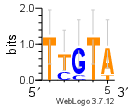

In [106]:
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/2024-cnu-lecture/data/mymotif.png"))

* Position-weight matrices 계산
* .counts 특성 사용

In [107]:
pwm = m.counts.normalize(pseudocounts=0.5)
print(pwm)

        0      1      2      3      4
A:   0.19   0.81   0.06   0.56   0.81
C:   0.06   0.06   0.69   0.06   0.06
G:   0.06   0.06   0.19   0.31   0.06
T:   0.69   0.06   0.06   0.06   0.06



In [108]:
pssm = pwm.log_odds()
print(pssm)

        0      1      2      3      4
A:  -0.42   1.70  -2.00   1.17   1.70
C:  -2.00  -2.00   1.46  -2.00  -2.00
G:  -2.00  -2.00  -0.42   0.32  -2.00
T:   1.46  -2.00  -2.00  -2.00  -2.00



In [109]:
background = {"A":0.3,"C":0.2,"G":0.2,"T":0.3}
pssm = pwm.log_odds(background)
print(pssm)

        0      1      2      3      4
A:  -0.68   1.44  -2.26   0.91   1.44
C:  -1.68  -1.68   1.78  -1.68  -1.68
G:  -1.68  -1.68  -0.09   0.64  -1.68
T:   1.20  -2.26  -2.26  -2.26  -2.26



* Using the PSSM score

In [116]:
for pos, score in pssm.search(test_seq, threshold=3.0):
    print("%d, %f " % (pos, score))
print(pssm.calculate(test_seq))

0, 3.643981 
10, 6.759458 
[  3.643981    -8.560285    -2.4004133   -5.6533937   -4.2748823
  -0.05645879 -10.145247    -3.3293302   -5.9753222   -3.5703382
   6.759458    -5.3903594   -5.8598447   -0.81545067  -0.81545067
   0.7695118   -6.3903594   -3.5379167    0.4255574   -1.9309279
 -10.145247    -3.3293302 ]


![](PWMScanning.png)

In [117]:
m.pseudocounts = 0.1
print(m.counts)
print(m.pwm)
print(m.pssm)


        0      1      2      3      4
A:   1.00   6.00   0.00   4.00   6.00
C:   0.00   0.00   5.00   0.00   0.00
G:   0.00   0.00   1.00   2.00   0.00
T:   5.00   0.00   0.00   0.00   0.00

        0      1      2      3      4
A:   0.17   0.95   0.02   0.64   0.95
C:   0.02   0.02   0.80   0.02   0.02
G:   0.02   0.02   0.17   0.33   0.02
T:   0.80   0.02   0.02   0.02   0.02

        0      1      2      3      4
A:  -0.54   1.93  -4.00   1.36   1.93
C:  -4.00  -4.00   1.67  -4.00  -4.00
G:  -4.00  -4.00  -0.54   0.39  -4.00
T:   1.67  -4.00  -4.00  -4.00  -4.00



### scikit-bio

scikit-bio is another library focused on bioinformatics, providing functionalities for sequence analysis, alignment, phylogenetics, and more.

#### Installation
```bash
pip install scikit-bio
```

#### Basic Usage Examples

**Reading and Writing Sequence Files:**
```python
import skbio

# Reading a FASTA file
for seq in skbio.io.read("example.fasta", format="fasta"):
    print(seq.metadata['id'])
    print(seq)

# Writing to a FASTA file
sequences = [seq for seq in skbio.io.read("example.fasta", format="fasta")]
skbio.io.write(sequences, "output.fasta", format="fasta")
```

**Sequence Analysis:**
```python
from skbio import DNA, RNA, Protein

# Creating sequences
dna_seq = DNA("AGTACACTGGT")
rna_seq = dna_seq.transcribe()
protein_seq = dna_seq.translate()

print("DNA: ", dna_seq)
print("RNA: ", rna_seq)
print("Protein: ", protein_seq)
```

**Alignment:**
```python
from skbio import DNA
from skbio.alignment import local_pairwise_align_ssw

seq1 = DNA("ACTGCTAGCTAG")
seq2 = DNA("GCTAGCTAGGTA")

alignment, score, start_end_positions = local_pairwise_align_ssw(seq1, seq2)

print("Alignment:\n", alignment)
print("Score:", score)
print("Start-End Positions:", start_end_positions)
```

**Phylogenetic Tree Construction:**
```python
from skbio import DistanceMatrix
from skbio.tree import nj

# Example distance matrix
dm = DistanceMatrix([[0.0, 0.2, 0.4],
                     [0.2, 0.0, 0.6],
                     [0.4, 0.6, 0.0]],
                    ['A', 'B', 'C'])

# Constructing a phylogenetic tree using Neighbor-Joining
tree = nj(dm)
print(tree.ascii_art())
```

### Example: Analyzing a Protein Sequence

Let’s put together an example that reads a protein sequence from a GenBank file, performs some basic analysis using Biopython, and aligns it using scikit-bio.

```python
from Bio import SeqIO
from Bio.Seq import Seq
from skbio import Protein
from skbio.alignment import global_pairwise_align_protein

# Read a protein sequence from a GenBank file
record = SeqIO.read("example.gb", "genbank")
protein_seq = record.seq.translate()

print("Protein Sequence:", protein_seq)

# Perform reverse translation to get the DNA sequence
dna_seq = protein_seq.reverse_translate(table=11)
print("Reverse Translated DNA Sequence:", dna_seq)

# Perform alignment with another protein sequence
seq1 = Protein(str(protein_seq))
seq2 = Protein("MKVLYNLKDG")

alignment, score, start_end_positions = global_pairwise_align_protein(seq1, seq2)

print("Alignment:\n", alignment)
print("Score:", score)
print("Start-End Positions:", start_end_positions)
```

### Explanation:
- **Reading Sequence**: We use Biopython to read a protein sequence from a GenBank file.
- **Sequence Analysis**: We perform basic sequence operations like translation and reverse translation.
- **Alignment**: We use scikit-bio to perform a global pairwise alignment between two protein sequences.

By mastering these bioinformatics libraries, you will be well-equipped to handle a wide range of bioinformatics tasks and analyses in your research. If you have specific questions or need further examples, feel free to ask!